# Linear Regression-2

## Content

- **Introduction to use case** 

- **Training**

- **R Square**

- **Univariate Linear Regression**

- **Multivariate Linear Regression**


## Introduction to Use case

- Let's continue with our Cars24 price prediction problem.
- We are given with various features such as age of car, odometer reading, model of car etc.
- First objective is to understand the task. Our task is to **predict the resale price of the car.**
- Resale price is numeric. 

#### Question: Are we doing classification or regression? 
Ans: Since we have to predict continuous numeric value, we are doing regression task,



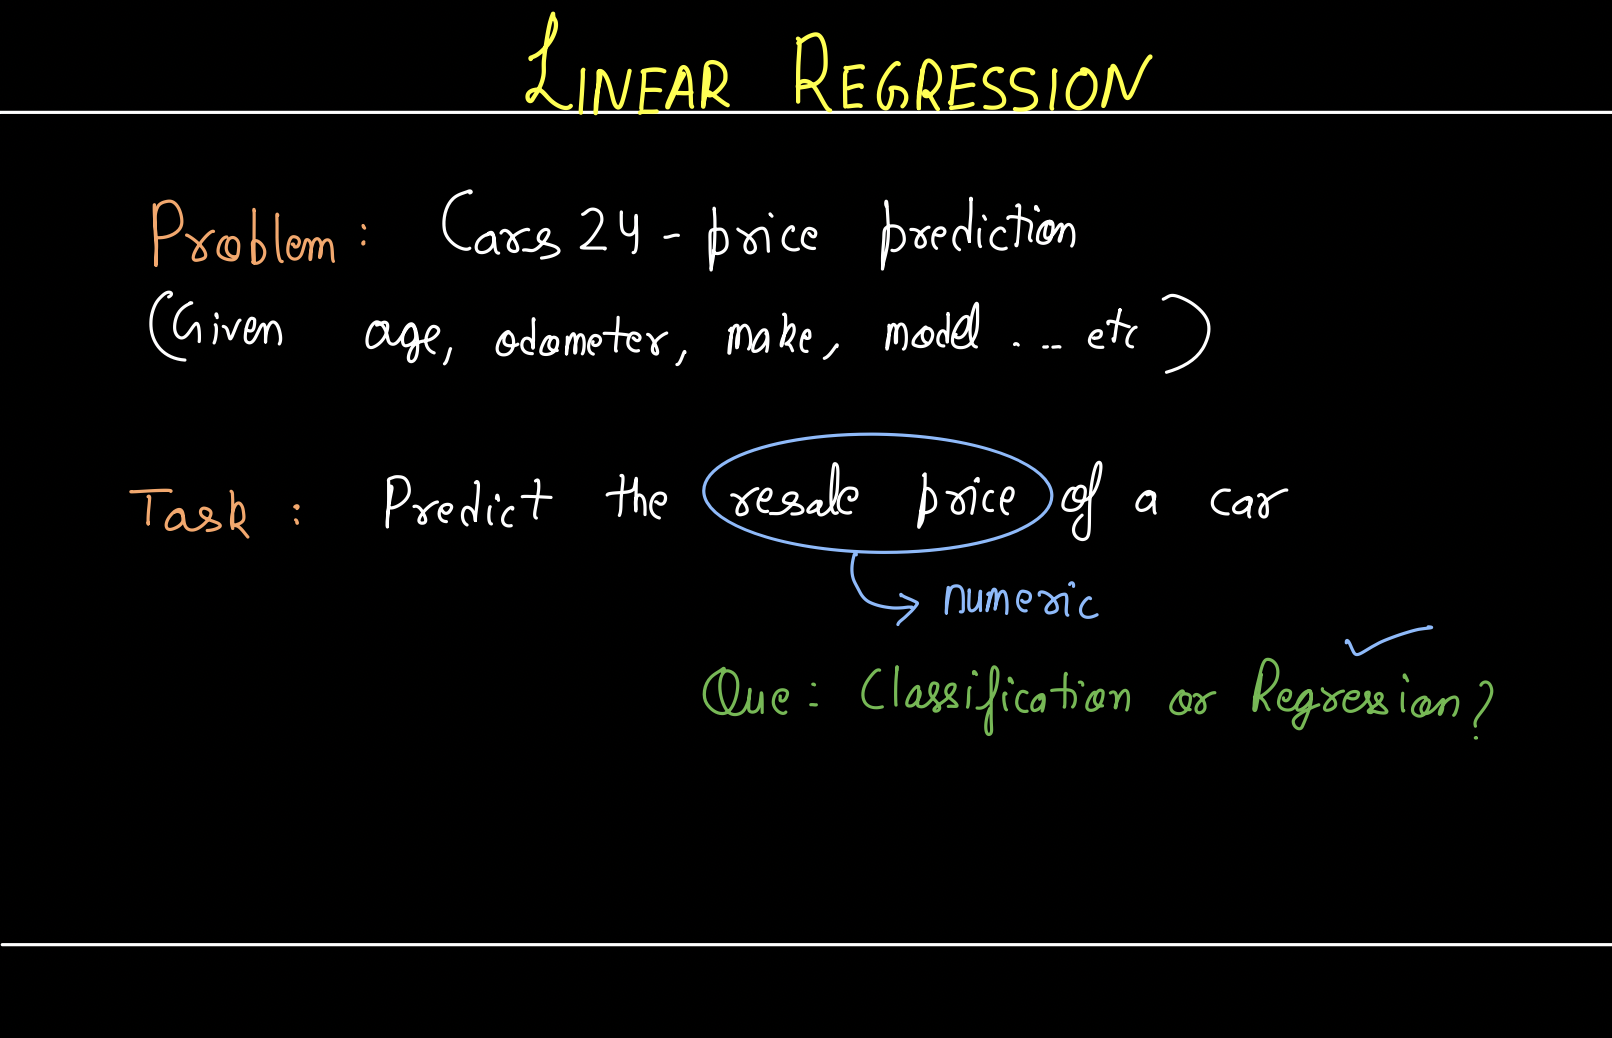

## Training

Lets now understand how we train a Linear Regression Model

We know how Regression is a Supervised Learning problem looks like









**RECAP**

#### What is the Goal of Supervised Learning?
Ans: Learn a mapping function/ hypothesis function h such that : h(X)→y.

- X denotes our independent variables and y denotes are dependent variable
- A pair (X, y) is called a training example 

## Metric: Coefficient of Determination  (R<sup>2</sup>)

Now, we have trained our model, how we check whether our model is performing well or not? We need a metric for that


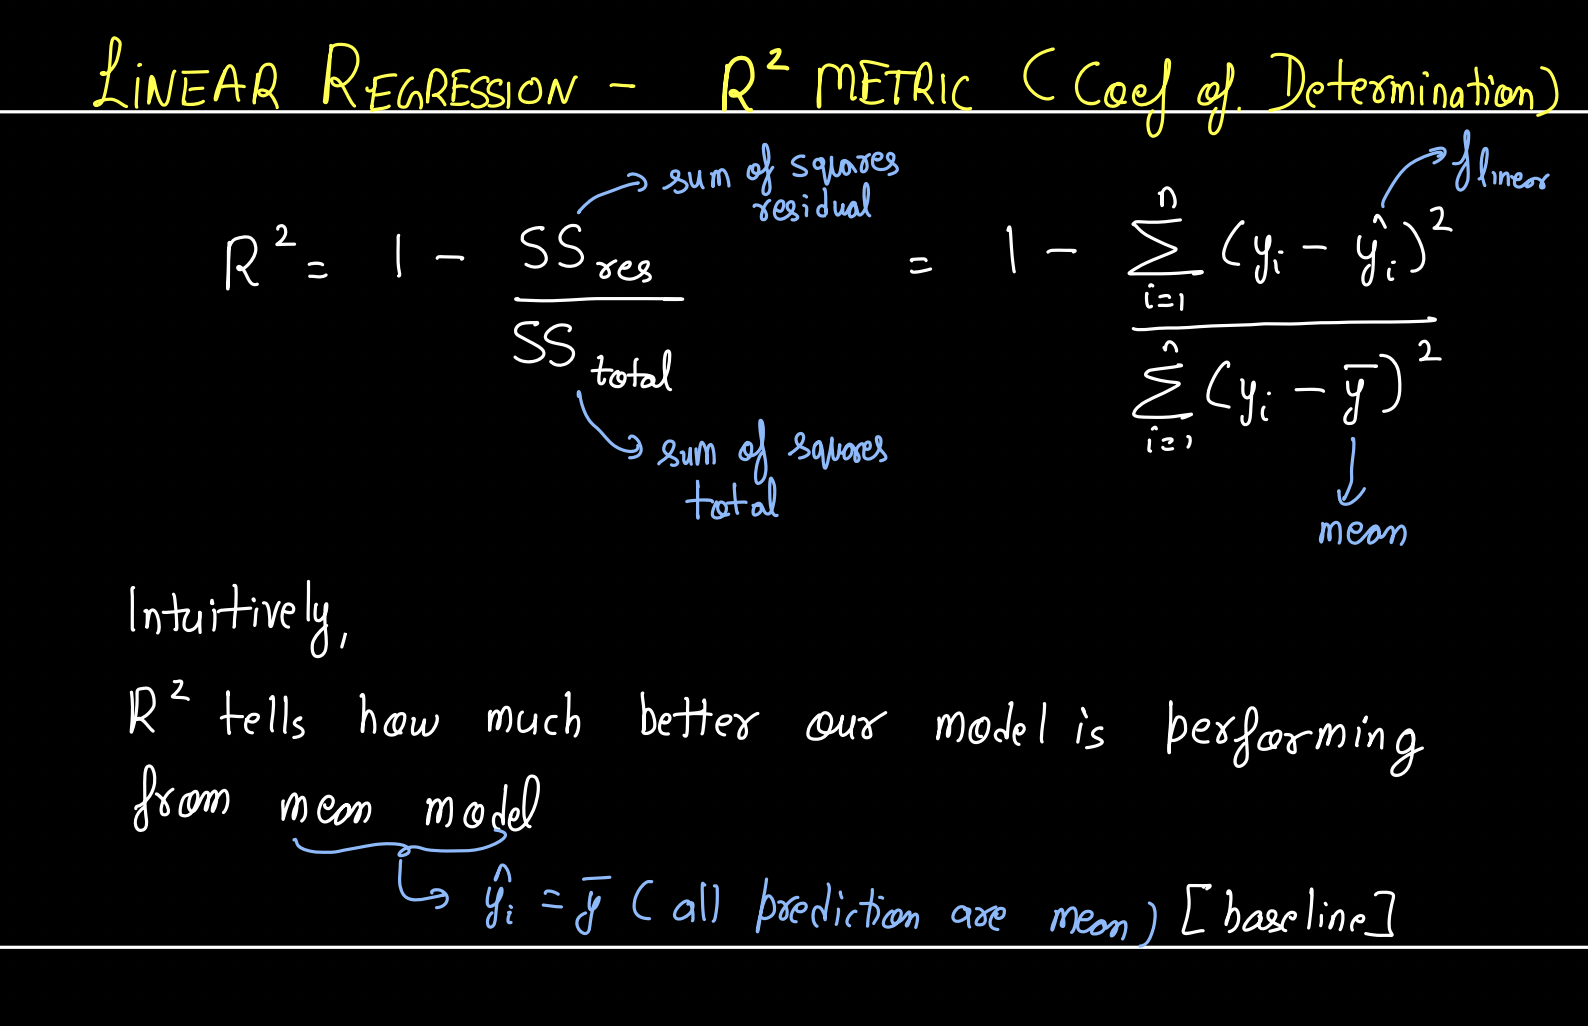

- SS_residual = sum of squared errors for the model that we built
- SS_total = sum of squared errors if the model was mean model.
- Mean model returns mean of yi's as predicted value everytime.
- Intuitively, R-square tells us that how much our model is performing better as compared to mean model.
- **Intuition behind considering mean model as baseline model?** Simplest model that you can build to predict a value is just take mean of all value and return it.

#### Geometric intuiton of R-square metric

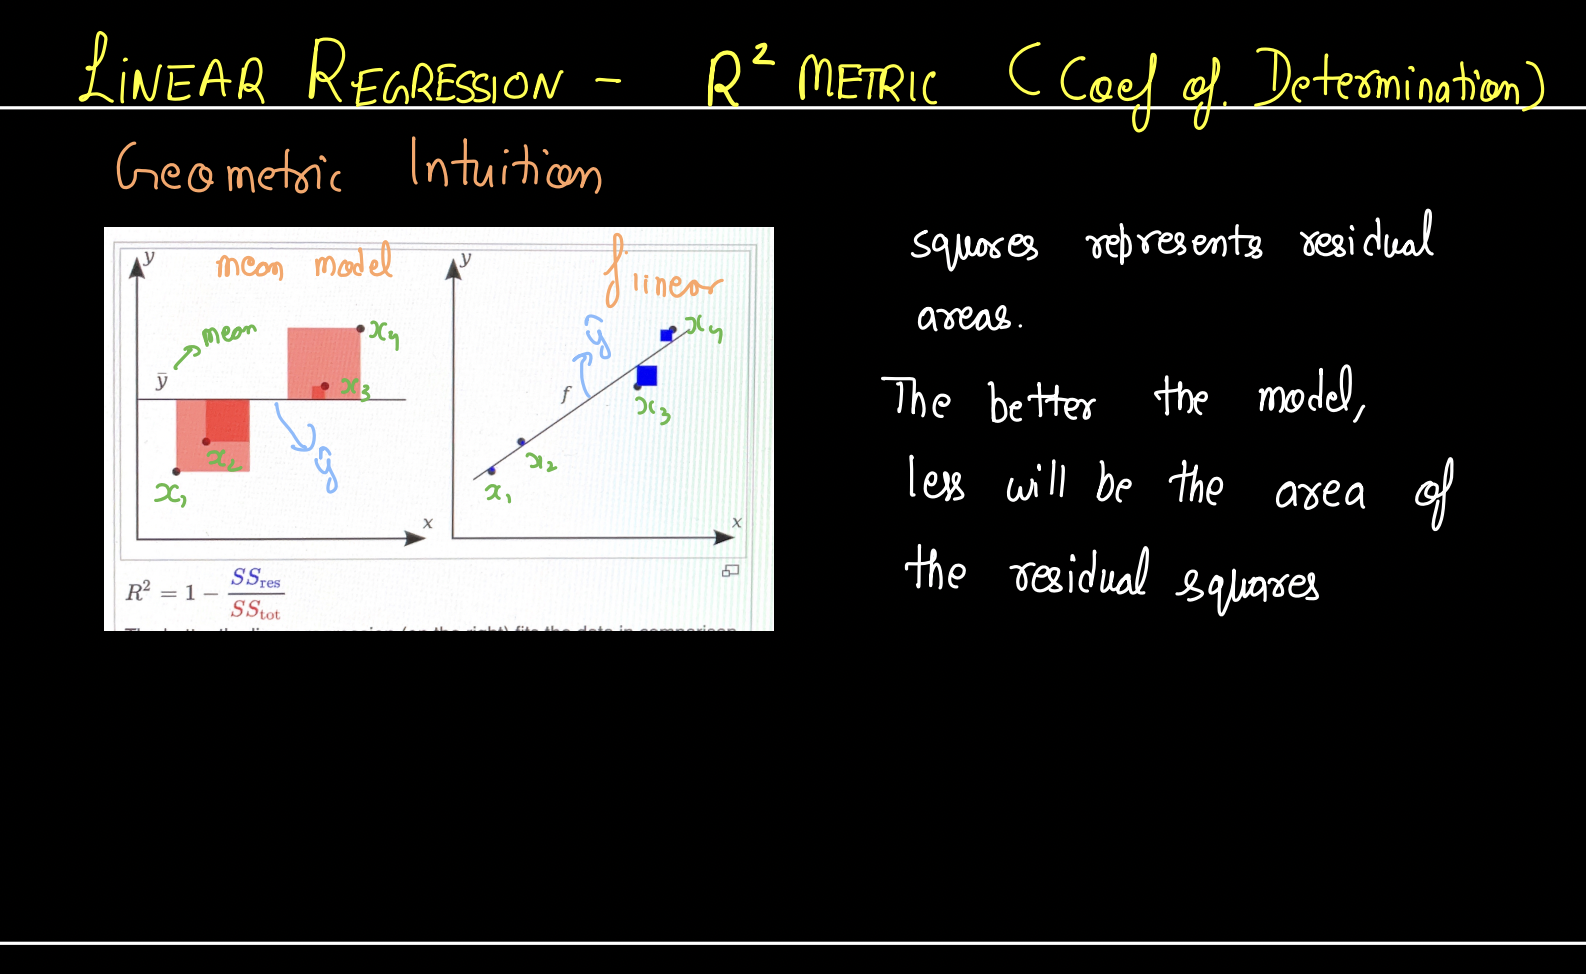

- Wiki refer: https://en.wikipedia.org/wiki/Coefficient_of_determination

#### Range of R-square

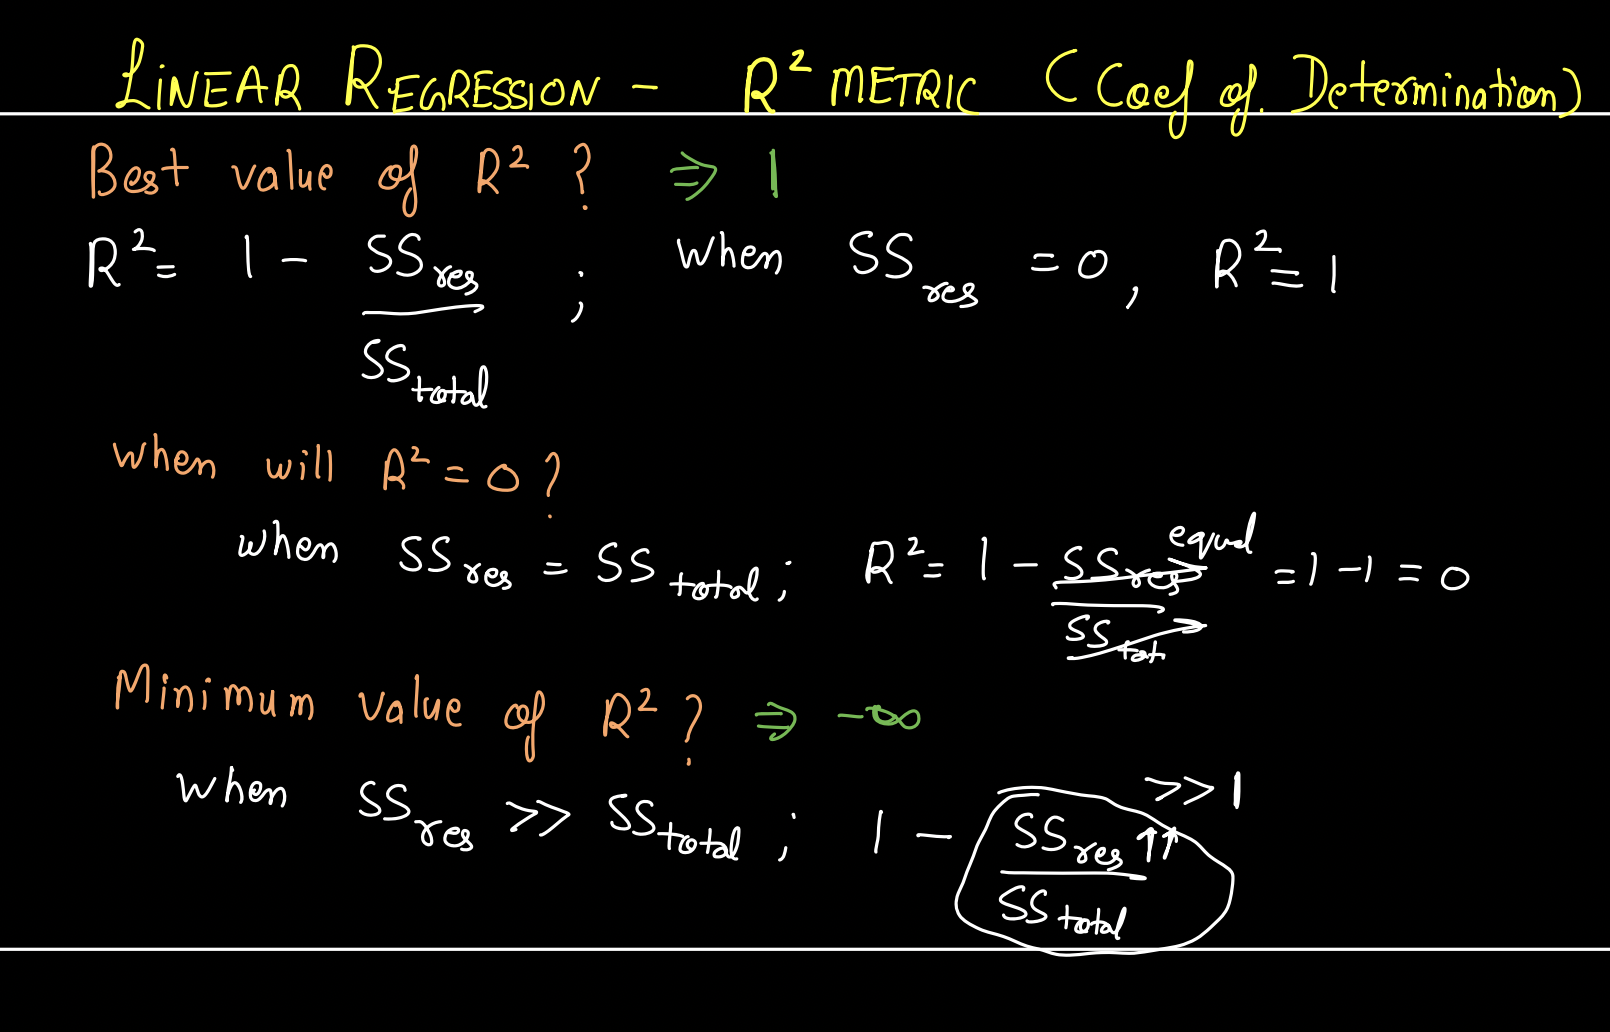

#### Question: What do think is best value of R-square?
**Ans: 1**

#### Question: Now, what do you think is minimum value of R-square ? 
**Ans: -inf**. 

When our model is far worse than mean model i.e. value of SS_residual >> SS_total, the value of R-square will tend to -inf.

- Best value of R-square is 1. When SS residual = 0, R-square = 1 
- R-square will be 0 when SS residual = SS total i.e. our model is mean model
- Minimum value of R-square will be -inf. When our model is far worse than mean model, R-square will tend to -inf. (SS residual >> SS total)
- Example when R-square will be large -ve value
  - Imagine you have all horizontal points and you predict the line of best fit as vertical.


#### What is a good R-square value ?

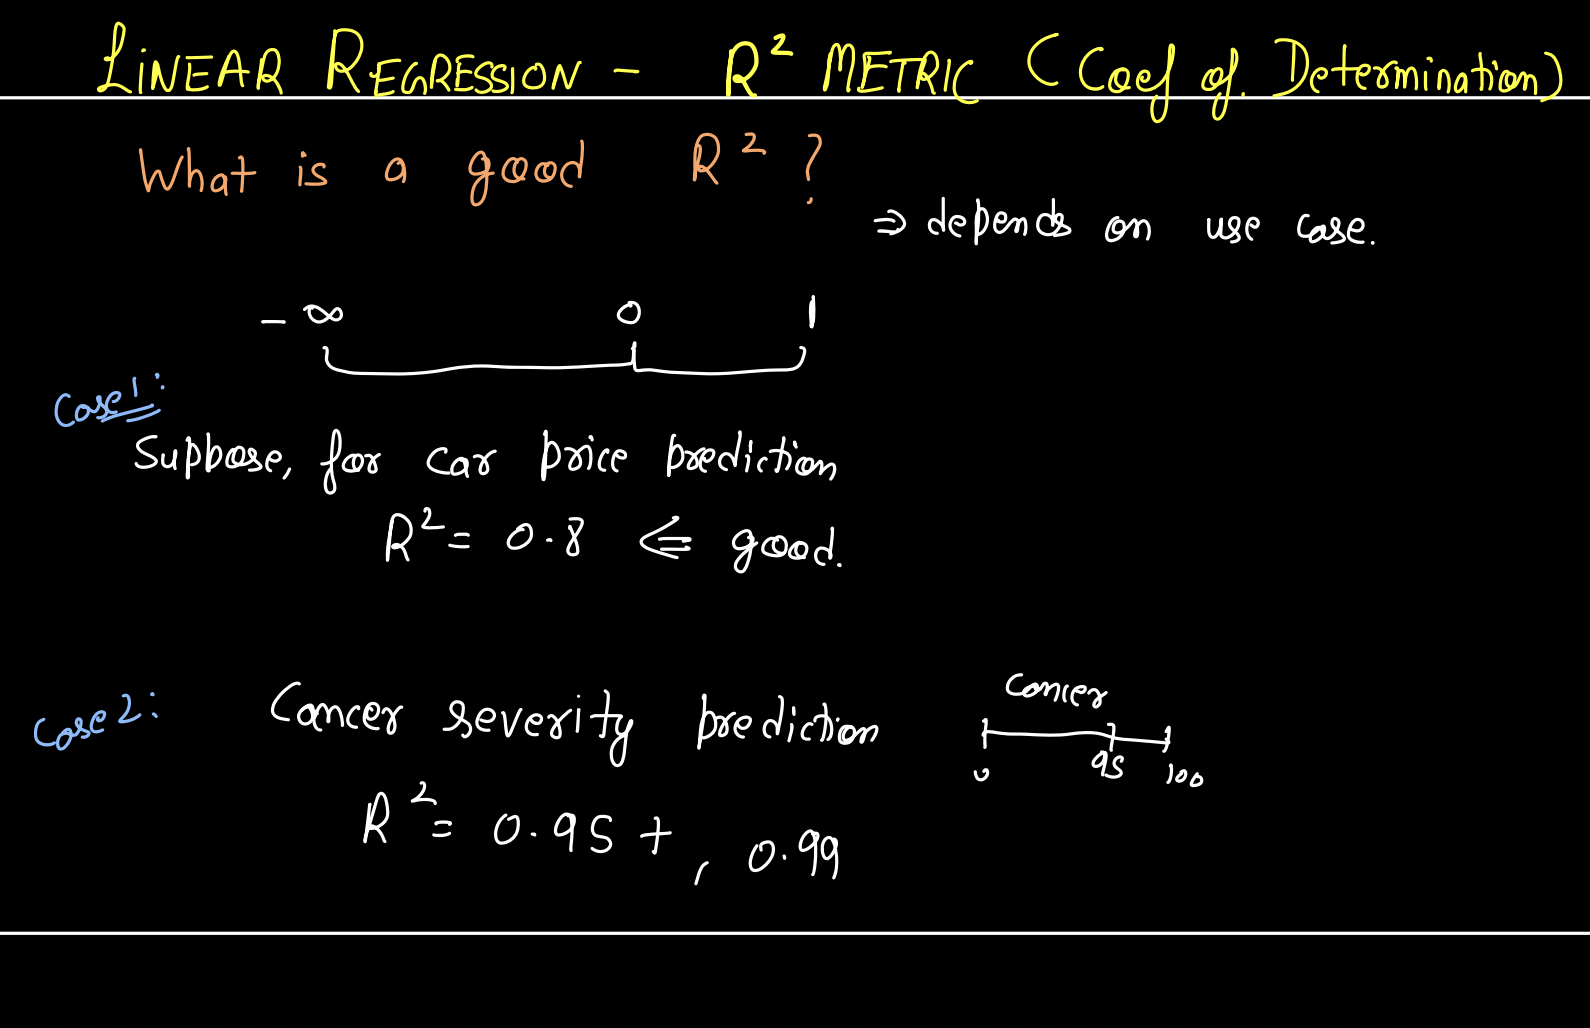

- Good value of R-square depends on use case.
- Consider use case 1 where you have to predict price of car. Even when you are off by few points, it will be okay. So, a value of 0.8 for R-square sounds good.
- Conider use case 2: Predict the severity of cancer (scale: 0 to 100). Here if the value of R-square is off, it can impact the treatment given to patient and hence life and death situation. 
- Hence R-square value of 0.95+ will be good here.


## Code for Univariate LR using Scikit Learn

#### Previously Done

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 247MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

In [ ]:
# define X and y
X = df["model"].values
Y = df["selling_price"].values

In [ ]:
def r2_score(Y,Y_hat):
    num = np.sum((Y-Y_hat)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1 - num/denom)
    return score

#### Scikit-learn
- Though we have already implemented Linear Regression model from scratch,
- We have a library which does it for us and provides key insights such as weights of the model, performance of the model.


- Link For linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

- Notice how ```model``` is just an object of Linear Regression Class
- Recall when implementing from scratch, how we used ```gradent_descent()``` for X number of epochs to train our Linear Regression model



####**How to train the model using LinearRegression class?**
- Scikit-learn provides an inbulit [fit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method to train the model



In [ ]:
model.fit(X,Y)

ValueError: ignored

- But when we used fit method on our X and Y, it gave a shape error

#### **Why was there shape error when using fit method?** 
- the documentation for fit method says:
  - X (array-like, sparse matrix) of shape (n_samples,n_features)
  - Y (array-like, sparse matrix) of shape (n_samples,) or (n_samples, n_features)

Lets check our X and Y:

In [ ]:
print(X.shape,Y.shape)

(19820,) (19820,)


- Notice how X and Y shapes are incompatible with the Scikit learn fit method
 



reshaping X, Y to the required shape

In [ ]:

X = X.reshape(X.size, 1)
Y = Y.reshape(Y.size, 1)

print(X.shape,Y.shape)

(19820, 1) (19820, 1)


Since now our Data is in required shape

- Now lets fit the model

In [ ]:
model.fit(X,Y)

LinearRegression()

Now that our model is trained,

#### How do we see the predictions of the trained **model** object?

In [ ]:
y_hat = model.predict(X)

print('Predicted')
print(y_hat[:3])
print('Actual')
print(Y[:3])

Predicted
[[-1.08634131]
 [-0.32158118]
 [-0.76220457]]
Actual
[[-1.11104589]
 [-0.22394353]
 [-0.91505816]]


#### What are the learnt parameters?

In [ ]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

[-3.98510607e-17] [[0.96505112]]


- recall from the previous lecture
  - w0, w1 = [6.6445724  4.79421248]
- Notice how scikit-learn did all the implementation much quickly and with less code.

Lets see how our LR model performed

Visualising Predictions

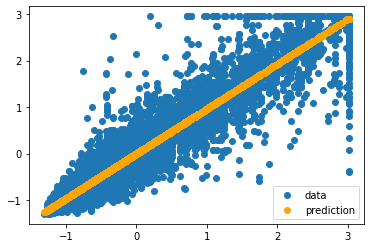

In [ ]:
fig = plt.figure()
plt.scatter(X,Y,label='data')
plt.scatter(X,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

#### How do we get the performance metric for our model?


```score``` Returns the coefficient of determination of the prediction ($R^2$)

In [ ]:
model.score(X,Y)

0.9313236629576508

- Notice how we got the similar $R^2$ value as when implemented from scratch
- Shows how Scikit-learn did the same things which we implemented but making the code simple

#### Does $R^2$ = 0.93, suggests our model good?
Ans: Yes, it means that our Univariate LR model performed much better than a mean model

####But can we be sure by just One Feature, we can estimate the selling price of a Car?####
- No, hence we will now look into more features, and how to perform Linear Regression on them


## Multivariate Linear Regression

#### Code for Multivariate LR from Scratch


Lets consider all of the features of Cars24 data to predict the selling price 

#### **What will be our Linear Regression model hypothesis?**
Before starting, let's simplify our notation a bit, let's define another variable 
$x_0 = 1$ :

$h(x) = w_0x_0 + w_1x_1 + w_2x_2 ...... w_nx_n = ∑_{i=0}^{i=n} w_ix_i = W^TX   $

- Now, both $W$  and $X$  are vectors, and thus, dot product ```np.dot()``` can be used. 

- Note that $W$  and $X$ are $n+1$  dimensional vectors, and $i$  ranges from $0 → n $.


In [ ]:
df.head()

selling_price      year  km_driven   mileage    engine  max_power  \
0      -1.111046 -0.801317   1.195828  0.045745 -1.310754  -1.157780   
1      -0.223944  0.450030  -0.737872 -0.140402 -0.537456  -0.360203   
2      -0.915058 -1.426990   0.035608 -0.582501 -0.537456  -0.404885   
3      -0.892365 -0.801317  -0.409143  0.329620 -0.921213  -0.693085   
4      -0.182683  0.137194  -0.544502  0.760085  0.042999   0.010435   

        age      make     model  Individual  Trustmark Dealer    Diesel  \
0  0.801317 -0.433854 -1.125683    1.248892         -0.098382 -0.985275   
1 -0.450030 -0.327501 -0.333227    1.248892         -0.098382 -0.985275   
2  1.426990 -0.327501 -0.789807    1.248892         -0.098382 -0.985275   
3  0.801317 -0.433854 -0.905265    1.248892         -0.098382 -0.985275   
4 -0.137194 -0.246579 -0.013096   -0.800710         -0.098382  1.014945   

   Electric       LPG    Petrol    Manual         5        >5  
0 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
1 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
2 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
3 -0.020095 -0.056917  1.024622  0.495818  0.444503 -0.424728  
4 -0.020095 -0.056917 -0.975970  0.495818  0.444503 -0.424728

**Getting X and Y**
- Removing the selling price and taking rest of the features in X

In [ ]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]

Convert X and Y from dataframes to numpy array

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

In [ ]:
print(X.shape, Y.shape)

(19820, 17) (19820,)


**Adding $x_0$ feature to X**

In [ ]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [ ]:
print(X.shape)

(19820, 18)


#### Multivariate Linear Regression

In [ ]:
def hypothesis(X,weight):
    return np.dot(X,weight)

**Mean Squared Error**

#### **How does the Error Function change?**
No change in the function, earlier one data point was one feature, now one data point has multiple features. Use the same MSE loss function.

In [ ]:
def error(X,y,weight):
    e = 0.0
    m = X.shape[0]
    y_hat = hypothesis(X,weight)
    e = np.sum((y-y_hat)**2)
    return e/m

Gradient Calculation

#### How does the Gradient Descent change for multiple features?
- Lets first recall from gradient descent univariate topic




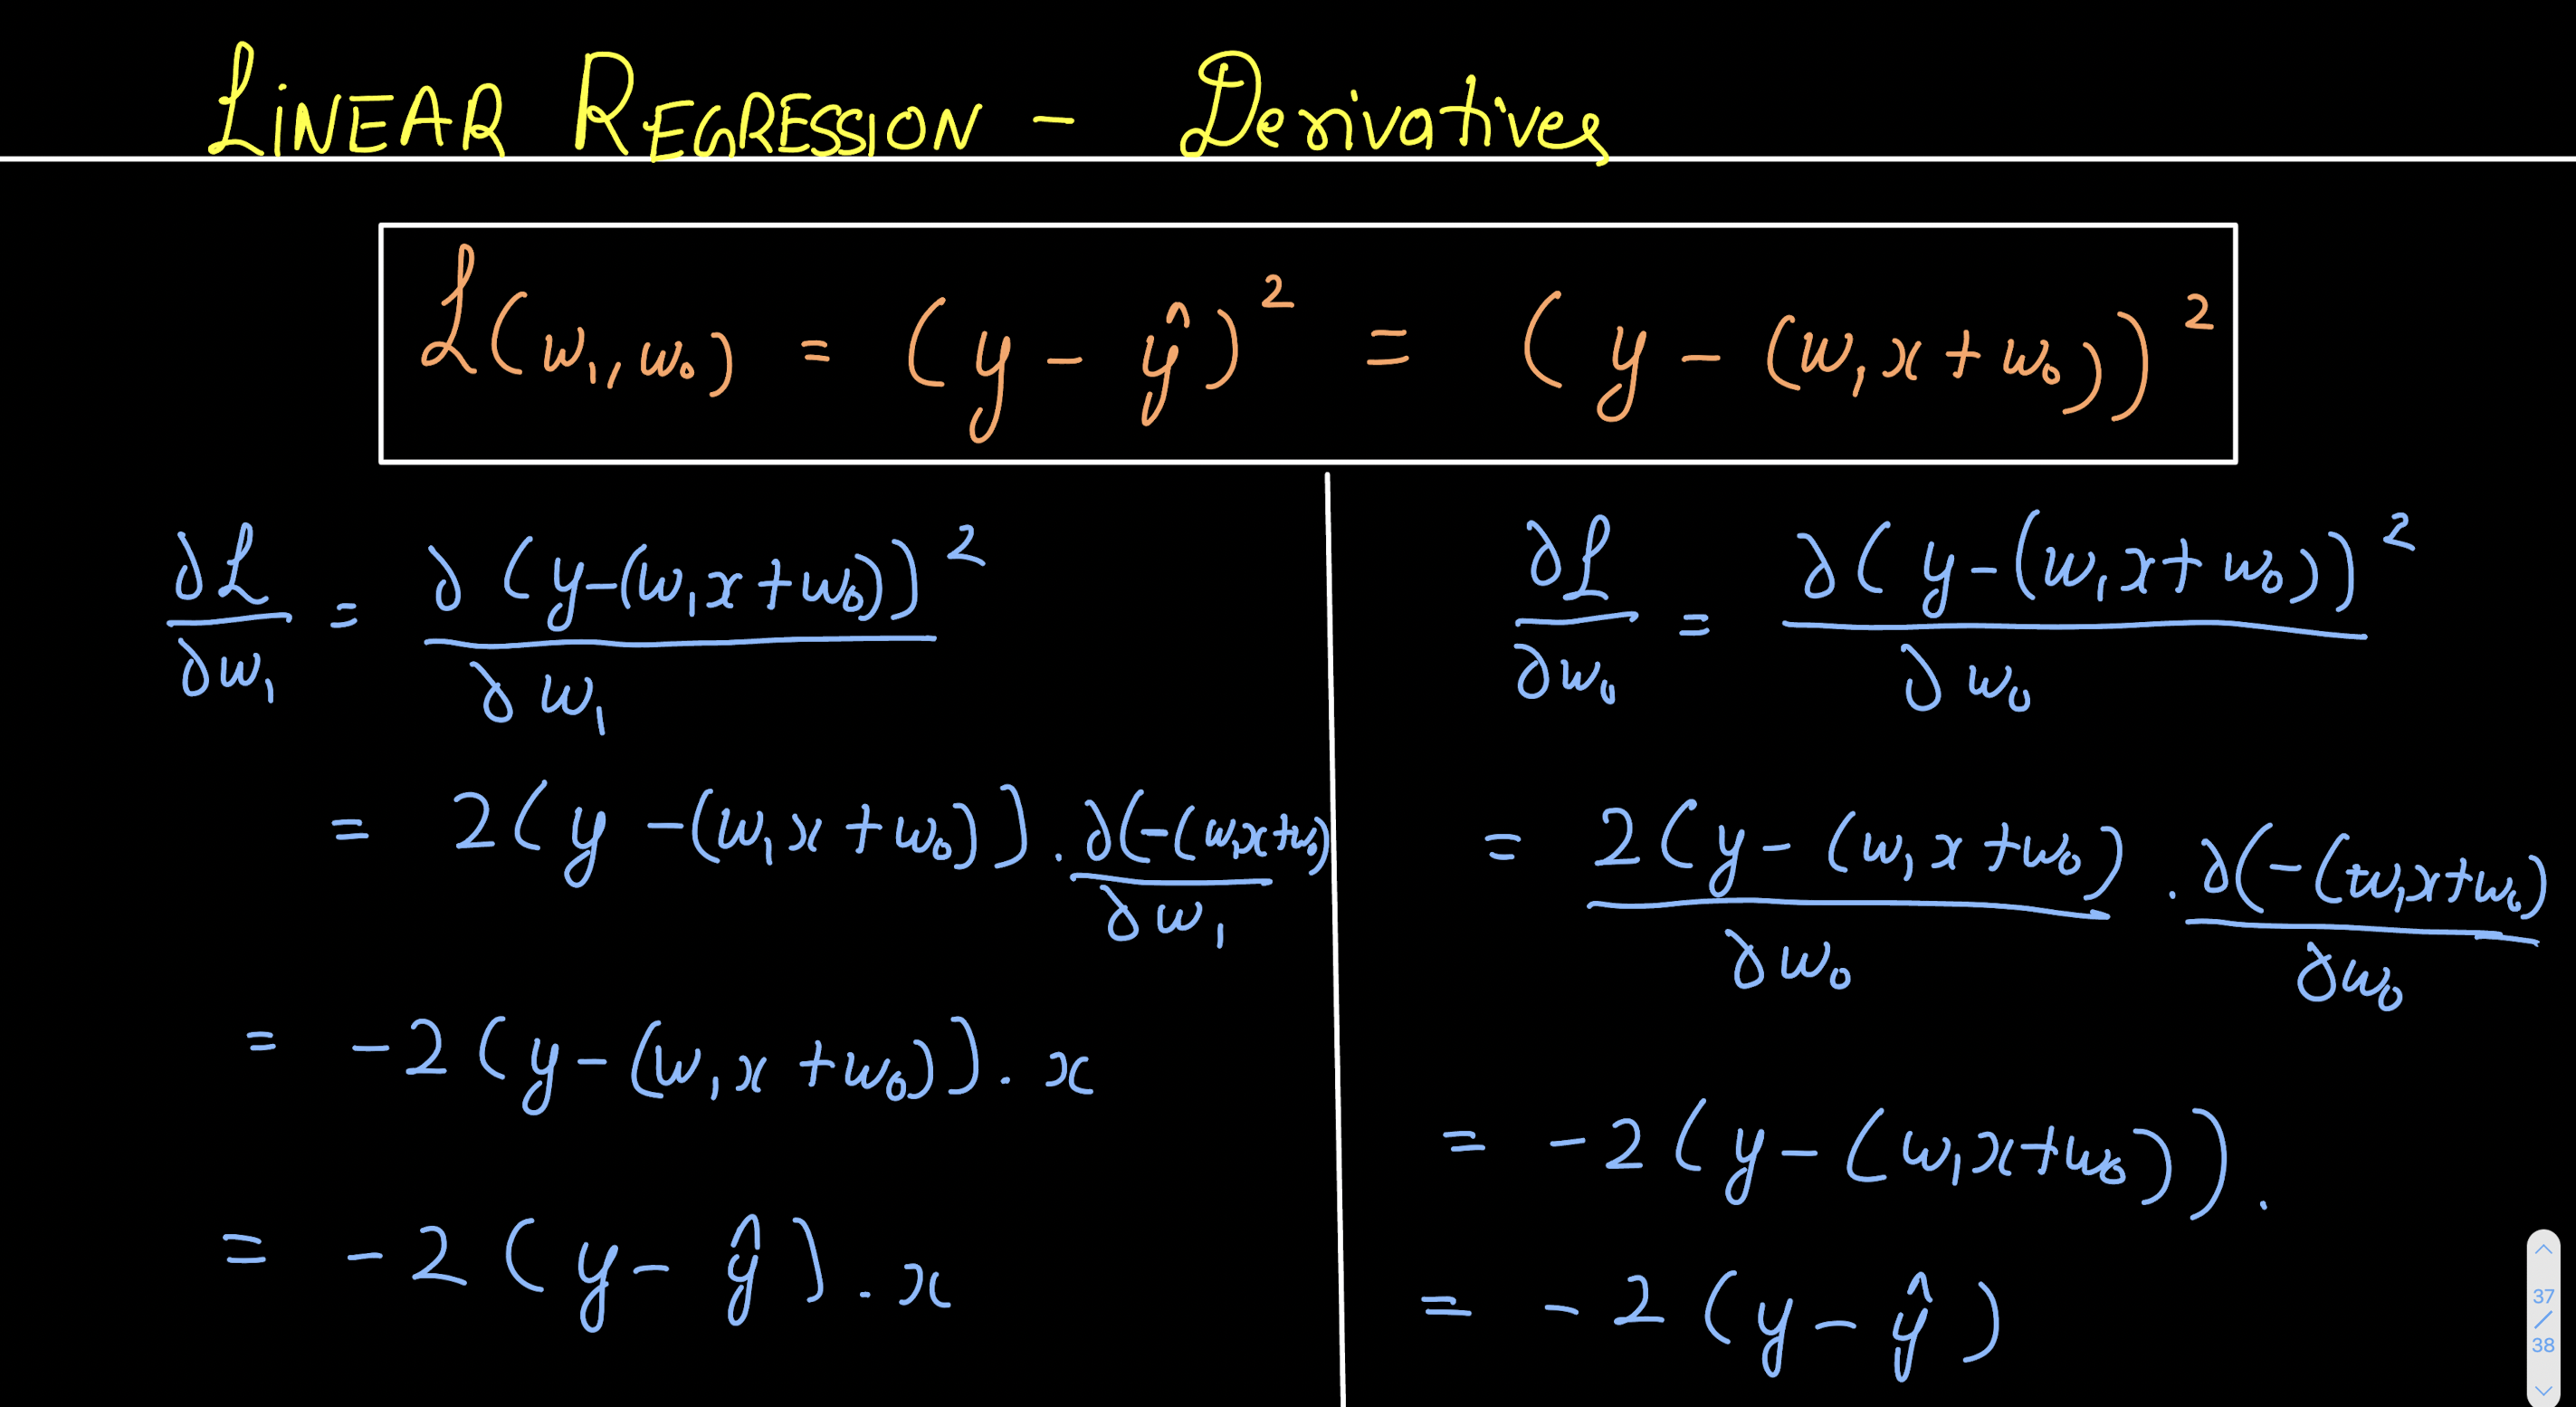

To calculate the gradients, we have to find partial derivatives of the los w.r.t various parameters w's. 


$ \frac{∂J}{∂w_i} = \frac{1}{2m} \frac{\partial ∑_{i=1}^{i=m}(y_i-h(x_i))^2 }{∂w_i} $

Where 
  - m is the number of samples
  - h(x) is the hypothesis function defined as : 
  $ ∑_{i=0}^{i=n} w_ix_i $

Notice, we used the same equation for calculation derivatives w.r.t w0 and w1.


Now, lets generalise this for any $w_i$

Taking the $\partial$ under the summation
  - Equation now becomes:
    - $ \frac{∂J}{∂w_i} = \frac{1}{2m} ∑_{i=1}^{i=m} \frac{\partial (y_i-h(x_i))^2 }{∂w_i} $

Recall from calculas, if $y=u^2$, then $\frac{dy}{du} = 2u$
- now equation becomes:
    - $ \frac{∂J}{∂w_i} = \frac{1}{2m} ∑_{i=1}^{i=m}2(y_i-h(x_i)) \frac{\partial (y_i-h(x_i)) }{∂w_i} $

Since $h(x) = ∑_{i=0}^{i=n} w_ix_i $
  - Equation becomes:
    - $ \frac{∂J}{∂w_i} = \frac{1}{2m} ∑_{i=1}^{i=m}2(y_i-h(x_i)) \frac{\partial (y_i-∑ _{j=0}^{j=n}w_ix_i) }{∂w_i} $

If $ y = -au $, where a is a constant, then $\frac{dy}{du} = -a $
  - Equation becomes:

    - $ \frac{∂J}{∂w_i} = \frac{1}{2m} ∑_{i=1}^{i=m}2(y_i-h(x_i))(-x_i) $ 











In [ ]:
def gradient(X,y,weight):
    
    y_hat = hypothesis(X,weight)
    grad = np.dot(X.T,(y_hat - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,epochs=500):
    
    n = X.shape[1]
    weight = np.zeros((n,))
    error_list = []
    
    for i in range(epochs):
        e = error(X,y,weight)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,weight)
        weight = weight - learning_rate*grad
        
    return weight, error_list

In [ ]:
import time
start = time.time()
weight, error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  0.29509472846984863


**What are the learnt parameters?**

In [ ]:
print(weight)

[-7.18788186e-17  6.49606223e-02 -1.82895655e-02 -4.83430286e-02
  3.02408637e-02  2.89670964e-02 -6.49606223e-02  6.15011893e-02
  7.92870481e-01 -1.69511557e-02 -3.43943374e-03  1.56662107e-02
  1.28017113e-02  3.01544203e-03 -2.09812350e-02 -1.31123716e-02
 -1.88085889e-02 -2.61485794e-02]


**How does the error change during training?**


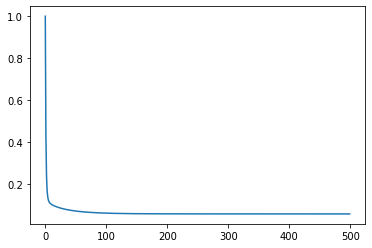

In [ ]:
fig = plt.figure()
plt.plot(error_list)
plt.show()

**What are predictions for X?**


In [ ]:
Y_hat = hypothesis(X,weight)

**How does the model perform ?**

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [ ]:
r2_score(Y,Y_hat)

0.9421852544960344